In [1]:
import cv2
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras import models,layers,Sequential
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense

Using TensorFlow backend.


In [2]:
path="/home/ubu/ML/leedsbutterfly/images/"
filenames=os.listdir(path)
categories=[]
for file in filenames:
    categories.append(file[:3])
        

In [3]:
data=pd.DataFrame({'filenames':filenames,'class':categories})

<function matplotlib.pyplot.show(*args, **kw)>

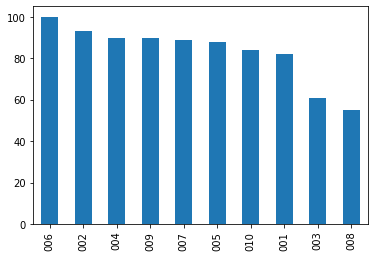

In [4]:
data['class'].value_counts().plot.bar()
plt.show

In [5]:
X=[]
Y=[]

In [6]:
for i in filenames:
    img=cv2.imread(path+i,cv2.IMREAD_COLOR)
    img=cv2.resize(img,(128,128))
    X.append(np.array(img))

In [7]:
X[0].shape

(128, 128, 3)

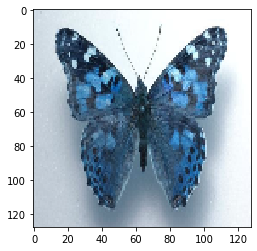

In [8]:
plt.imshow(X[0])

In [9]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
lb=LabelEncoder()
data['y']=lb.fit_transform(data['class'])

In [10]:
Y=data['y'].values
Y=Y.reshape(len(Y),1)
onehot=OneHotEncoder()
Y=onehot.fit_transform(Y)

/home/ubu/.local/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [11]:
model=Sequential()
model.add(Conv2D(32,(5,5),activation='relu',input_shape=(128,128,3)))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))


model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))


model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())

model.add(Dense(256,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [12]:
model.compile(loss='categorical_crossentropy',optimizer = 'adam' , metrics = ['accuracy'])

In [13]:
X=np.array(X)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.3)

In [14]:
model.fit(xtrain,ytrain,epochs=30,batch_size=12)

Epoch 1/30
582/582 [==============================] - 14s 23ms/step - loss: 4.9610 - accuracy: 0.1907
Epoch 2/30
582/582 [==============================] - 11s 19ms/step - loss: 1.4975 - accuracy: 0.4639
Epoch 3/30
582/582 [==============================] - 11s 18ms/step - loss: 1.0113 - accuracy: 0.6581
Epoch 4/30
582/582 [==============================] - 10s 18ms/step - loss: 0.7453 - accuracy: 0.7234
Epoch 5/30
582/582 [==============================] - 13s 21ms/step - loss: 0.4288 - accuracy: 0.8557
Epoch 6/30
582/582 [==============================] - 13s 22ms/step - loss: 0.2908 - accuracy: 0.9089
Epoch 7/30
582/582 [==============================] - 13s 22ms/step - loss: 0.2206 - accuracy: 0.9210
Epoch 8/30
582/582 [==============================] - 11s 19ms/step - loss: 0.5939 - accuracy: 0.8179
Epoch 9/30
582/582 [==============================] - 11s 19ms/step - loss: 0.1793 - accuracy: 0.9313
Epoch 10/30
582/582 [==============================] - 13s 22ms/step - loss: 0.182

In [15]:
loss,accuracy=model.evaluate(xtest,ytest,batch_size=32)

250/250 [==============================] - 2s 6ms/step


In [16]:
accuracy

0.8840000033378601